In [1]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.3 MB/s eta 0:00:00


In [2]:
from deep_translator import GoogleTranslator

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from datetime import datetime
import calendar
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Ensure you have the stopwords dataset
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
comments = pd.read_csv('/kaggle/input/comments/youtube_video_comments.csv')

In [6]:
comments = comments[['Video Title', 'Author', 'Comment', 'Published At', 'Like Count']]

In [7]:
comments.sample(5)

,Video Title,Author,Comment,Published At,Like Count
56,Program For Merge Sort in C,@who_thekaushik,your voice is also like a melody .. i can list...,2021-09-09T21:18:21Z,0
71,Program For Merge Sort in C,@mr.sagnik294,very helpful thanks alot,2020-10-10T15:15:53Z,0
57,Program For Merge Sort in C,@who_thekaushik,mam i wish you were my teacher in chandigarh u...,2021-09-09T21:16:55Z,0
205,Factorial Of A Large Number | Theory+Program T...,@devendrakotiya_ele0753,Aapka program wrong output derha hai<br>Plz ch...,2021-01-20T06:40:29Z,0
190,How To Reverse A string By Using Recursion In ...,@sudipsen3677,Nice explanation ❤️🔥,2021-10-07T03:03:12Z,1


In [8]:
def translate_to_english(text):
    try:
        return GoogleTranslator(source="auto", target="en").translate(text)
    except Exception:
        return text

In [9]:
## example
translate_to_english('majedar video!')

'amazing video!'

In [10]:
comments["translated_comment"] = comments["Comment"].apply(translate_to_english)

In [11]:
comments.sample(5)

,Video Title,Author,Comment,Published At,Like Count,translated_comment
109,Program For Quick Sort In C,@devamani2478,thanks madam thank you so much madam...,2022-08-31T06:54:23Z,0,thanks madam thank you so much madam...
114,Program For Quick Sort In C,@manishsingh1179,"Mam, Could you please provide source code of it ?",2022-03-01T11:08:33Z,1,"Mam, Could you please provide source code of it ?"
118,Program For Quick Sort In C,@VijayPatel-ez4lp,Thanks mam,2021-10-17T06:55:09Z,0,Thanks mam
204,Factorial Of A Large Number | Theory+Program T...,@satishchand7518,Programming ka logic pahle batana chayae,2021-04-06T18:05:52Z,0,The logic of programming should be explained f...
163,Interview Question | How To Rotate An Array Of...,@codeambition2k636,Cool video :),2020-04-20T09:56:24Z,0,Cool video :)


In [12]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Video Title         271 non-null    object
 1   Author              271 non-null    object
 2   Comment             271 non-null    object
 3   Published At        271 non-null    object
 4   Like Count          271 non-null    int64 
 5   translated_comment  267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.8+ KB


In [13]:
comments['Published At'] = pd.to_datetime(comments['Published At'])

In [14]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Video Title         271 non-null    object             
 1   Author              271 non-null    object             
 2   Comment             271 non-null    object             
 3   Published At        271 non-null    datetime64[ns, UTC]
 4   Like Count          271 non-null    int64              
 5   translated_comment  267 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 12.8+ KB


In [15]:
comments.head()

,Video Title,Author,Comment,Published At,Like Count,translated_comment
0,SQL CASE STATEMENT JOIN #mysql #sql,@maheshmenta6078,good explanation,2024-10-07 10:26:49+00:00,0,good explanation
1,SQL LEFT JOIN #mysql #sql,@pawanpt2682,Very nice maam,2023-09-10 14:04:01+00:00,0,Very nice ma'am
2,Practical Implementation of enum data type in ...,@mostafaf.t3651,Awesome,2024-01-04 00:46:23+00:00,0,Awesome
3,Unique Key and its Practical Implementation in...,@Arhankhan0786k,Next week is my semester exam and i don&#39;t ...,2023-02-05 17:15:52+00:00,0,Next week is my semester exam and i don&#39;t ...
4,Primary Key in SQL #mysql #sql #primarykey,@faunseveryn3311,✨ &#39;PromoSM&#39;,2023-04-07 17:27:07+00:00,0,✨ &#39;PromoSM&#39;


In [16]:
# comments['Published At'] = comments['Published At'].dt.date

In [17]:
comments['year'] = comments['Published At'].dt.year

In [18]:
comments['month_name'] = comments['Published At'].dt.month_name()
comments['month'] = comments['Published At'].dt.month

In [19]:
comments['day'] = comments['Published At'].dt.day
comments['day_name'] = comments['Published At'].dt.day_name()

In [20]:
comments.head()

,Video Title,Author,Comment,Published At,Like Count,translated_comment,year,month_name,month,day,day_name
0,SQL CASE STATEMENT JOIN #mysql #sql,@maheshmenta6078,good explanation,2024-10-07 10:26:49+00:00,0,good explanation,2024,October,10,7,Monday
1,SQL LEFT JOIN #mysql #sql,@pawanpt2682,Very nice maam,2023-09-10 14:04:01+00:00,0,Very nice ma'am,2023,September,9,10,Sunday
2,Practical Implementation of enum data type in ...,@mostafaf.t3651,Awesome,2024-01-04 00:46:23+00:00,0,Awesome,2024,January,1,4,Thursday
3,Unique Key and its Practical Implementation in...,@Arhankhan0786k,Next week is my semester exam and i don&#39;t ...,2023-02-05 17:15:52+00:00,0,Next week is my semester exam and i don&#39;t ...,2023,February,2,5,Sunday
4,Primary Key in SQL #mysql #sql #primarykey,@faunseveryn3311,✨ &#39;PromoSM&#39;,2023-04-07 17:27:07+00:00,0,✨ &#39;PromoSM&#39;,2023,April,4,7,Friday


<Axes: xlabel='year'>

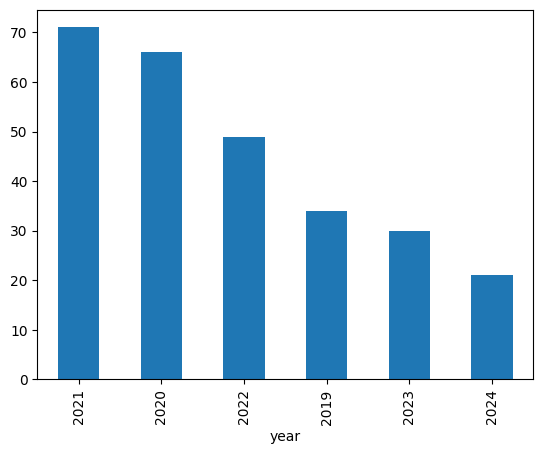

In [21]:
comments['year'].value_counts().plot(kind = 'bar')

<Axes: xlabel='day_name'>

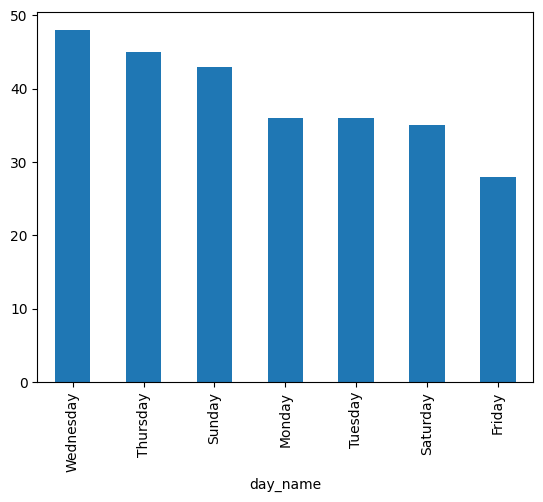

In [22]:
comments['day_name'].value_counts().plot(kind = 'bar')

In [23]:
comment_counts  = comments.groupby(['year', 'month_name']).size().unstack()

In [24]:
comment_counts

month_name,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2019,NaN,6.0,2.0,14.0,NaN,3.0,1.0,2.0,NaN,3.0,2.0,1.0
2020,30.0,2.0,4.0,2.0,NaN,1.0,2.0,NaN,3.0,9.0,6.0,7.0
2021,3.0,6.0,9.0,6.0,8.0,1.0,4.0,1.0,5.0,6.0,11.0,11.0
2022,1.0,4.0,6.0,2.0,4.0,4.0,2.0,6.0,7.0,7.0,3.0,3.0
2023,1.0,NaN,2.0,5.0,3.0,NaN,3.0,4.0,2.0,2.0,2.0,6.0
2024,2.0,1.0,NaN,3.0,2.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0


In [25]:
month_order = list(calendar.month_name[1:])
comment_counts = comment_counts[month_order]

In [26]:
comment_counts

month_name,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2019,NaN,14.0,2.0,NaN,NaN,1.0,3.0,6.0,1.0,2.0,3.0,2.0
2020,NaN,2.0,NaN,30.0,3.0,2.0,1.0,2.0,7.0,6.0,9.0,4.0
2021,8.0,6.0,1.0,3.0,5.0,4.0,1.0,6.0,11.0,11.0,6.0,9.0
2022,4.0,2.0,6.0,1.0,7.0,2.0,4.0,4.0,3.0,3.0,7.0,6.0
2023,3.0,5.0,4.0,1.0,2.0,3.0,NaN,NaN,6.0,2.0,2.0,2.0
2024,2.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0,NaN


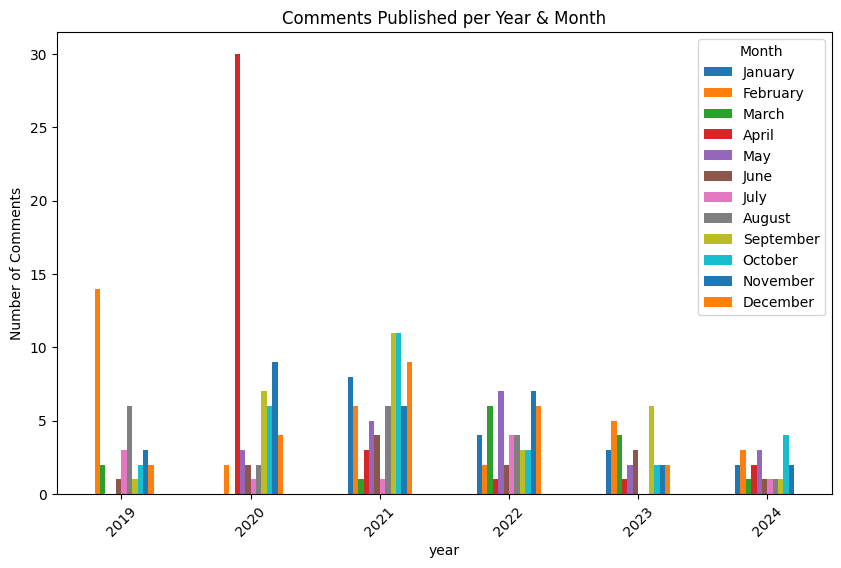

In [27]:
comment_counts.plot(kind='bar', figsize=(10, 6), ylabel='Number of Comments', title='Comments Published per Year & Month')
plt.xticks(rotation=45)  
plt.legend(title="Month")
plt.show()

In [28]:
example = comments['translated_comment'][50]
example

'Roses are red, Violets are blue<br>There will always be an Indian<br>Who would&#39;ve love to help you'

In [29]:
comment = example.replace("<br>", " ")
comment = BeautifulSoup(comment, "html.parser").get_text()
comment = re.sub(r"&#39;", "'", comment)
comment = re.sub(r"[^a-zA-Z0-9\s']", "", comment)
comment = comment.lower()
# stop_words = set(stopwords.words('english'))
words = comment.split()
# filtered_words = [word for word in words if word not in stop_words]
filtered_words = [word for word in words]
example = " ".join(filtered_words)
example

"roses are red violets are blue there will always be an indian who would've love to help you"

In [30]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['roses',
 'are',
 'red',
 'violets',
 'are',
 'blue',
 'there',
 'will',
 'always',
 'be']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('roses', 'NNS'),
 ('are', 'VBP'),
 ('red', 'JJ'),
 ('violets', 'NNS'),
 ('are', 'VBP'),
 ('blue', 'JJ'),
 ('there', 'RB'),
 ('will', 'MD'),
 ('always', 'RB'),
 ('be', 'VB')]

In [32]:
entities = nltk.chunk.ne_chunk(tagged)

In [33]:
entities.pprint()

(S
  roses/NNS
  are/VBP
  red/JJ
  violets/NNS
  are/VBP
  blue/JJ
  there/RB
  will/MD
  always/RB
  be/VB
  an/DT
  indian/JJ
  who/WP
  would/MD
  've/VBP
  love/VB
  to/TO
  help/VB
  you/PRP)


In [34]:
## VADER sentiment scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [35]:
sia.polarity_scores('I am so happy!') # negative, neutral, positive

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [36]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [37]:
example

"roses are red violets are blue there will always be an indian who would've love to help you"

In [38]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.7845}

In [39]:
## on whole dataset
def clean_comment(comment):
    if not isinstance(comment, str):  # Check if comment is None or NaN
        return ""
    comment = comment.replace("<br>", " ")
    comment = BeautifulSoup(comment, "html.parser").get_text()
    comment = re.sub(r"&#39;", "'", comment)  # &#39; → '
    comment = re.sub(r"[^a-zA-Z0-9\s']", "", comment)
    comment = comment.lower()
#     stop_words = set(stopwords.words('english'))
    words = comment.split()
    filtered_words = [word for word in words]
    cleaned_comment  = " ".join(filtered_words)
    return cleaned_comment 

In [40]:
## with stopwords removal
comments['clean_comment'] = comments['translated_comment'].apply(clean_comment)

In [41]:
comments['Id'] = range(1, len(comments)+1)

In [42]:
res={}
for i, row in tqdm(comments.iterrows(), total=len(comments)):
    text = row['clean_comment']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/271 [00:00<?, ?it/s]

In [43]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(comments, how = 'left')

In [44]:
# sentiment scores with the metadata
vaders.head()

,Id,neg,neu,pos,compound,Video Title,Author,Comment,Published At,Like Count,translated_comment,year,month_name,month,day,day_name,clean_comment
0,1,0.0,0.256,0.744,0.4404,SQL CASE STATEMENT JOIN #mysql #sql,@maheshmenta6078,good explanation,2024-10-07 10:26:49+00:00,0,good explanation,2024,October,10,7,Monday,good explanation
1,2,0.0,0.393,0.607,0.4754,SQL LEFT JOIN #mysql #sql,@pawanpt2682,Very nice maam,2023-09-10 14:04:01+00:00,0,Very nice ma'am,2023,September,9,10,Sunday,very nice ma'am
2,3,0.0,0.000,1.000,0.6249,Practical Implementation of enum data type in ...,@mostafaf.t3651,Awesome,2024-01-04 00:46:23+00:00,0,Awesome,2024,January,1,4,Thursday,awesome
3,4,0.0,0.777,0.223,0.9011,Unique Key and its Practical Implementation in...,@Arhankhan0786k,Next week is my semester exam and i don&#39;t ...,2023-02-05 17:15:52+00:00,0,Next week is my semester exam and i don&#39;t ...,2023,February,2,5,Sunday,next week is my semester exam and i don't know...
4,5,0.0,1.000,0.000,0.0000,Primary Key in SQL #mysql #sql #primarykey,@faunseveryn3311,✨ &#39;PromoSM&#39;,2023-04-07 17:27:07+00:00,0,✨ &#39;PromoSM&#39;,2023,April,4,7,Friday,'promosm'


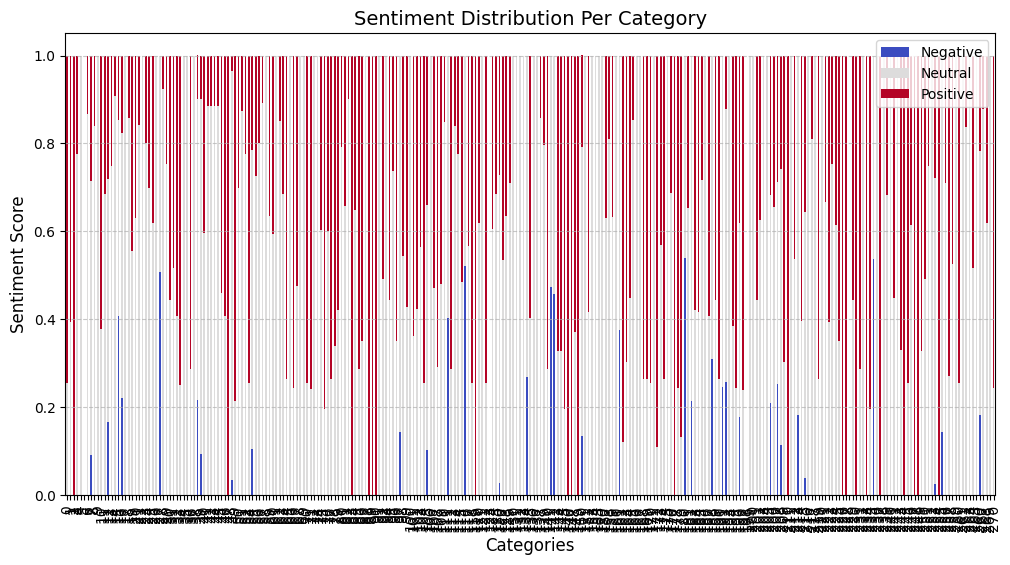

In [45]:
# Plot stacked bar chart
vaders[['neg', 'neu', 'pos']].plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))

plt.title("Sentiment Distribution Per Category", fontsize=14)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.legend(["Negative", "Neutral", "Positive"], loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

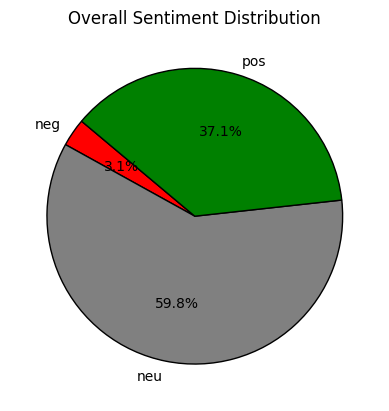

In [46]:
vaders[['neg', 'neu', 'pos']].mean().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'gray', 'green'], startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Overall Sentiment Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()

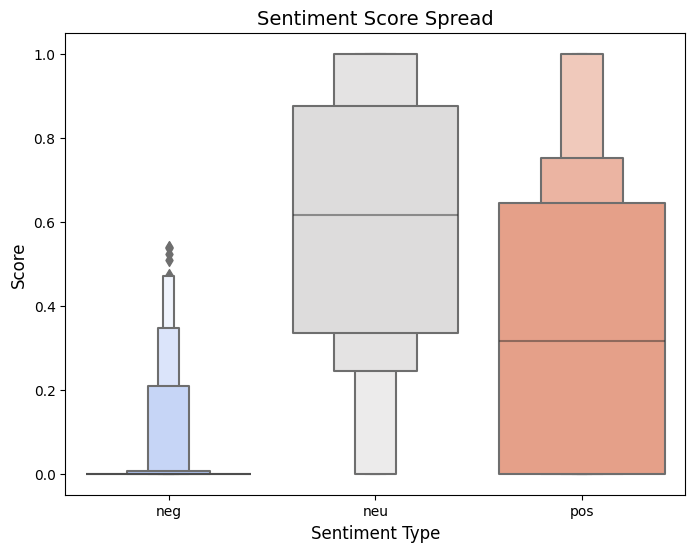

In [47]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=vaders[['neg', 'neu', 'pos']], palette="coolwarm")
plt.title("Sentiment Score Spread", fontsize=14)
plt.xlabel("Sentiment Type", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.show()

In [48]:
## Roberta pretrained model (twitter sentiment)
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import requests

In [49]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [50]:
example

"roses are red violets are blue there will always be an indian who would've love to help you"

In [51]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.7845}

In [52]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.0033383372,
 'roberta_neu': 0.08075349,
 'roberta_pos': 0.91590816}

In [53]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [54]:
res={}
for i, row in tqdm(comments.iterrows(), total=len(comments)):
    try:
        text = row['clean_comment']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename={}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}']=value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'broke for id: {myid}')

  0%|          | 0/271 [00:00<?, ?it/s]

In [55]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.244,
 'vader_pos': 0.756,
 'vader_compound': 0.4754,
 'roberta_neg': 0.0066650845,
 'roberta_neu': 0.046571787,
 'roberta_pos': 0.9467631}

In [56]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(comments, how = 'left')

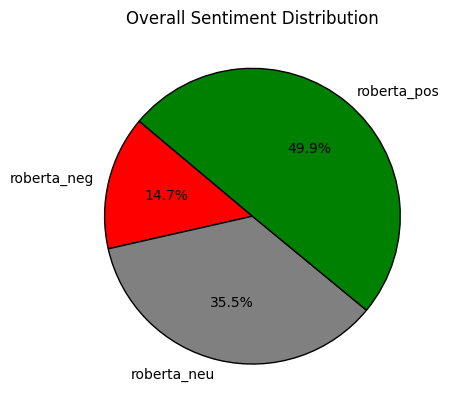

In [57]:
results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].mean().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'gray', 'green'], startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Overall Sentiment Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()

In [58]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Video Title', 'Author',
       'Comment', 'Published At', 'Like Count', 'translated_comment', 'year',
       'month_name', 'month', 'day', 'day_name', 'clean_comment'],
      dtype='object')

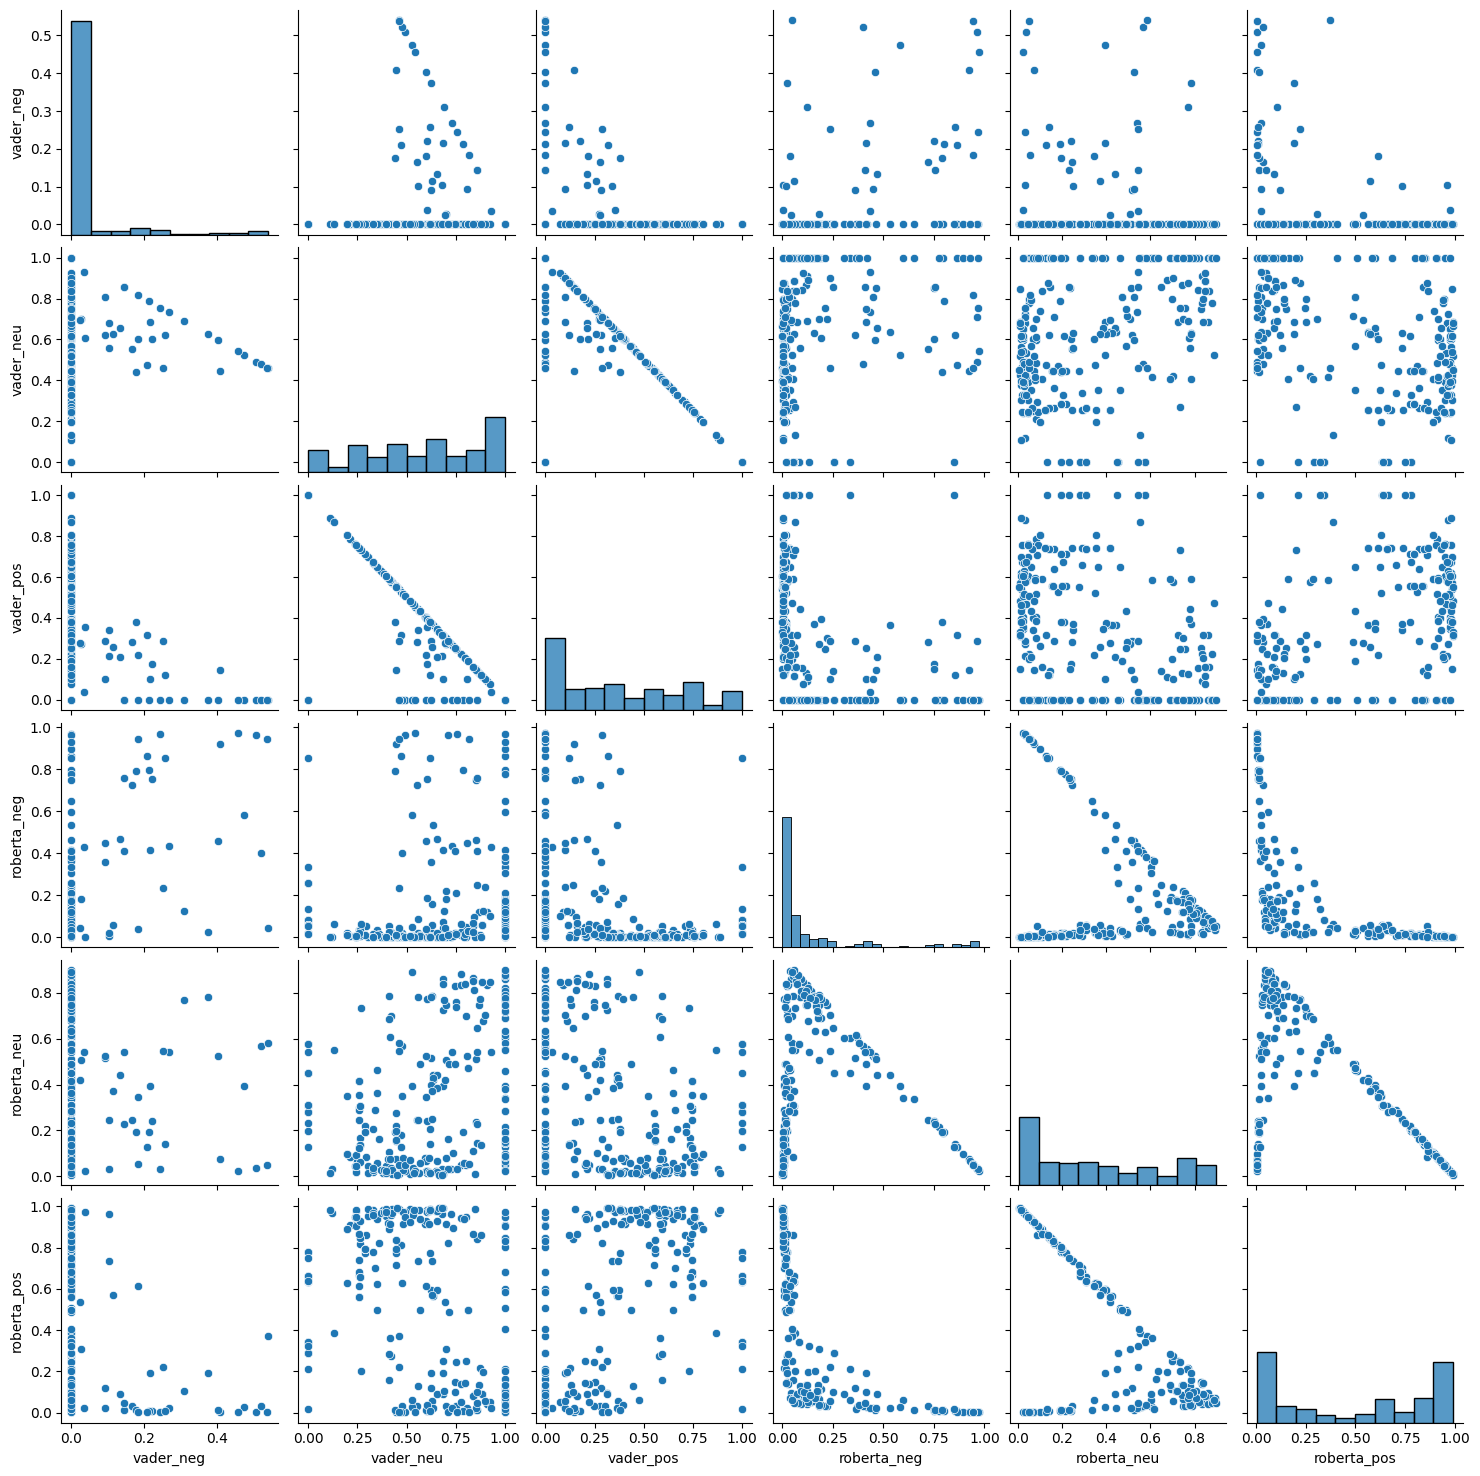

In [59]:
sns.pairplot(data = results_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], palette='tab10')
plt.show()

In [60]:
## transformer pipeline
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [61]:
sent_pipeline('I am happy!')[0]['label']

'POSITIVE'

In [62]:
comments['sent_pipeline_op'] = comments['clean_comment'].apply(sent_pipeline).str[0].str['label']

In [63]:
comments.head()

,Video Title,Author,Comment,Published At,Like Count,translated_comment,year,month_name,month,day,day_name,clean_comment,Id,sent_pipeline_op
0,SQL CASE STATEMENT JOIN #mysql #sql,@maheshmenta6078,good explanation,2024-10-07 10:26:49+00:00,0,good explanation,2024,October,10,7,Monday,good explanation,1,POSITIVE
1,SQL LEFT JOIN #mysql #sql,@pawanpt2682,Very nice maam,2023-09-10 14:04:01+00:00,0,Very nice ma'am,2023,September,9,10,Sunday,very nice ma'am,2,POSITIVE
2,Practical Implementation of enum data type in ...,@mostafaf.t3651,Awesome,2024-01-04 00:46:23+00:00,0,Awesome,2024,January,1,4,Thursday,awesome,3,POSITIVE
3,Unique Key and its Practical Implementation in...,@Arhankhan0786k,Next week is my semester exam and i don&#39;t ...,2023-02-05 17:15:52+00:00,0,Next week is my semester exam and i don&#39;t ...,2023,February,2,5,Sunday,next week is my semester exam and i don't know...,4,POSITIVE
4,Primary Key in SQL #mysql #sql #primarykey,@faunseveryn3311,✨ &#39;PromoSM&#39;,2023-04-07 17:27:07+00:00,0,✨ &#39;PromoSM&#39;,2023,April,4,7,Friday,'promosm',5,NEGATIVE


In [64]:
value_counts = comments[['sent_pipeline_op']].value_counts()

<Axes: ylabel='count'>

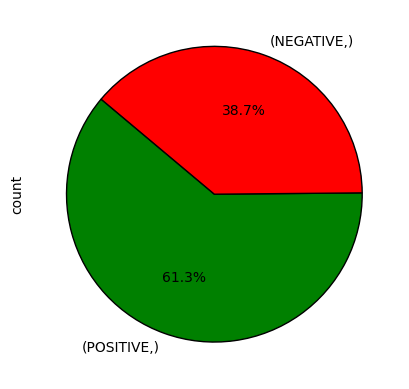

In [65]:
value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=140, wedgeprops={'edgecolor': 'black'})

In [66]:
results_df['sent_pipeline_op'] = results_df['clean_comment'].apply(sent_pipeline).str[0].str['label']

In [67]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Video Title,Author,...,Published At,Like Count,translated_comment,year,month_name,month,day,day_name,clean_comment,sent_pipeline_op
0,1,0.0,0.256,0.744,0.4404,0.035895,0.295575,0.668530,SQL CASE STATEMENT JOIN #mysql #sql,@maheshmenta6078,...,2024-10-07 10:26:49+00:00,0,good explanation,2024,October,10,7,Monday,good explanation,POSITIVE
1,2,0.0,0.393,0.607,0.4754,0.003809,0.044531,0.951659,SQL LEFT JOIN #mysql #sql,@pawanpt2682,...,2023-09-10 14:04:01+00:00,0,Very nice ma'am,2023,September,9,10,Sunday,very nice ma'am,POSITIVE
2,3,0.0,0.000,1.000,0.6249,0.023495,0.196776,0.779729,Practical Implementation of enum data type in ...,@mostafaf.t3651,...,2024-01-04 00:46:23+00:00,0,Awesome,2024,January,1,4,Thursday,awesome,POSITIVE
3,4,0.0,0.777,0.223,0.9011,0.010076,0.048903,0.941022,Unique Key and its Practical Implementation in...,@Arhankhan0786k,...,2023-02-05 17:15:52+00:00,0,Next week is my semester exam and i don&#39;t ...,2023,February,2,5,Sunday,next week is my semester exam and i don't know...,POSITIVE
4,5,0.0,1.000,0.000,0.0000,0.190779,0.692082,0.117139,Primary Key in SQL #mysql #sql #primarykey,@faunseveryn3311,...,2023-04-07 17:27:07+00:00,0,✨ &#39;PromoSM&#39;,2023,April,4,7,Friday,'promosm',NEGATIVE


In [68]:
# results_df['Published At'] = results_df['Published At'].astype(str)
# results_df.to_excel('sentiment_analysis_report.xlsx', index=False)